### Simple linear example 

#### Import relevant libraries

In [1]:
# We must always import relevant libraries for our problem at hand. 
# numpy is a must 
import numpy as np

#matplotlib and mpl_toolkits are nt necessary. We employ them for the sole purpose of visualisation the results.
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Generate random input data to train on 

In [5]:
# First, we should declare a variable containing the size of the training set we want to generate
observations = 1000
# We will work with two variables as inputs xs and zs
xs = np.random.uniform(-10,10,(observations,1))
zs = np.random.uniform(-10,10,(observations,1))
#We combine the two dimensions into one input matrix
inputs = np.column_stack((xs,zs))
#Check if the dimension of inputs are nxk where n is number of observations and k is number of inputs
print(inputs.shape)

(1000L, 2L)


### Generate the targets we will aim at

In [8]:
# We add a small random noise to the targets function
noise = np.random.uniform(-1,1,(observations,1))
targets = 2*xs - 3*zs + 5 + noise
print(targets.shape)

(1000L, 1L)


### Plot the training data

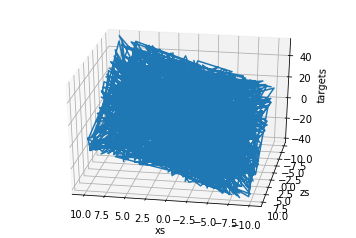

In [16]:
#reshape targets
targets = targets.reshape(observations,)
#print(targets.shape) = (1000L,)
# Declare the figure 
fig = plt.figure()

#A method allowing us to create the 3D plot
ax = fig.add_subplot(111, projection='3d')
# Choose axes 
ax.plot(xs,zs,targets)
# Set labels 
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')

#fiddle with the azim parameter to plot the data from different angles.
ax.view_init(azim=100)
plt.show()

In [17]:
# We reshape the targets back to the shape that they were in before plotting.
# This reshaping is a side-effect of the 3D plot. Sorry for that.
targets = targets.reshape(observations,1)

### Declare and initialize : weights, biasis and learning rate

In [23]:
# We will initialize the weights and biases randomly in some small initial range.
init_range = 0.1
# Weights are of size k x m, where k is the number of input variables and m is the number of output variables
weights = np.random.uniform(low = -init_range,high = init_range,size = (2,1))
# Biases are of size 1 since there is only 1 output. The bias is a scalar.
biases = np.random.uniform(low = -init_range,high = init_range,size =1)
print(weights)
print(biases)

[[-0.06828626]
 [-0.05813992]]
[0.09876689]


### Set a learning rate

In [24]:
# Set some small learning rate (denoted eta in the lecture). 
# 0.02 is going to work quite well for our example. Once again, you can play around with it.
# It is HIGHLY recommended that you play around with it.
eta = 0.02

### Train the model
#### Game plan for each iteration 
* Calculate outputs
* Compare outputs to targets through the loss 
* Print the loss
* Adjust the weights and biases

In [28]:
for i in range(100):
    outputs = np.dot(inputs, weights)+ biases #biaise is a scalar, python add scalar to matrice element 
    delta = outputs - targets
    loss = np.sum(delta **2) /2 / observations #mean in order to be independant from observations
    print(loss) # at each step, to keep an eye on whether it is decreasing 
    
    delta_scaled = delta / observations #in this way the model is universal (independent from number of observation)
    # Update weights
    weights = weights - eta * np.dot(inputs.T,delta_scaled) # .dot product = sum of products
    biases = biases - eta * np.sum(delta_scaled)

0.3913202039772478
0.38247756201628774
0.3739847136175299
0.3658278217923581
0.35799359691000937
0.350469275045422
0.34324259718358746
0.3363017892465267
0.3296355429103526
0.3232329971811623
0.3170837206997445
0.31117769474626805
0.30550529691726513
0.30005728544831056
0.294824784156864
0.2897992679807303
0.28497254908858904
0.28033676353995357
0.2758843584728321
0.27160807979821605
0.2675009603813384
0.26355630869045926
0.2597676978946763
0.25612895539299635
0.2526341527576162
0.24927759607502079
0.2460538166691623
0.24295756219161194
0.23998378806416232
0.23712764925993526
0.2343844924096186
0.23174984821995065
0.2292194241921202
0.22678909762820215
0.22445490891424527
0.22221305506906555
0.2200598835482301
0.21799188629314364
0.21600569401553765
0.21409807070804984
0.21226590837195672
0.21050622195345772
0.20881614448027142
0.20719292239061837
0.20563391104697193
0.20413657042728084
0.20269846098663125
0.20131723968261575
0.1999906561579264
0.1987165490739554
0.1974928425894314
0.1

In [29]:
print (weights)
print(biases)

[[ 2.00570999]
 [-3.00036173]]
[5.07949258]


Text(0,0.5,'targets')

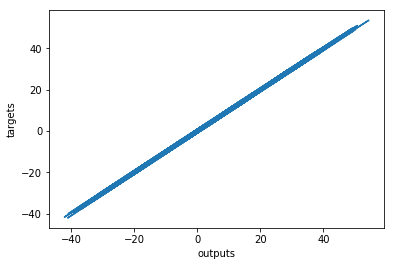

In [30]:
# Plot the outputs against the targets 
plt.plot(outputs, targets)
plt.xlabel('outputs')
plt.ylabel('targets')